In [1]:
import numpy as np
import sys
sys.path.append("../src")
from constants import WIDTH, HEIGHT
from skimage.io import imshow
%matplotlib inline

In [2]:
np.zeros((HEIGHT, WIDTH)).shape

(1280, 1918)

In [3]:
import h5py

In [4]:
f = h5py.File("../data/train.h5", "r")

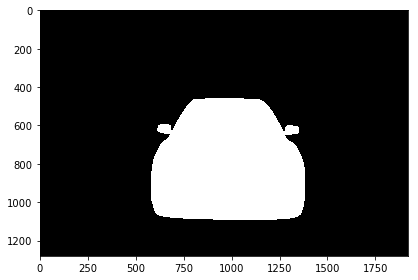

In [5]:
imshow(f["y_data"][0].squeeze())

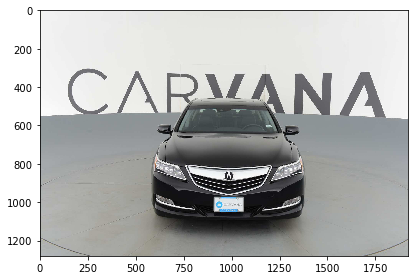

In [6]:
imshow(f["x_data"][0])

In [7]:
from generator import train_generator_resized
batch = next(train_generator_resized(n_fold=0, size=(128, 128), batch_size=2))

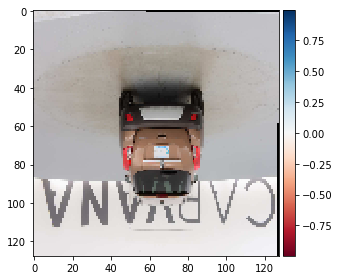

In [8]:
imshow(batch[0][0] * 255)

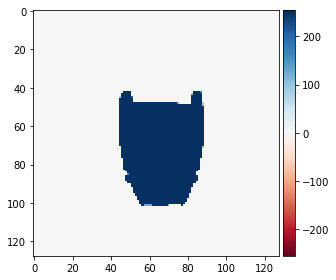

In [9]:
imshow(batch[1][0].squeeze() * 255)

In [11]:
from model import UnetModel

In [12]:
model = UnetModel("test", (1024, 1024))

../src/unet.py:64: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ac..., inputs=Tensor("in...)`
  model = Model(input=inputs, outputs=conv12)


In [14]:
model.load_weights("/home/westside/projects/carvana-image-masking/weights/1024.best.weights.h5py")

/home/westside/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


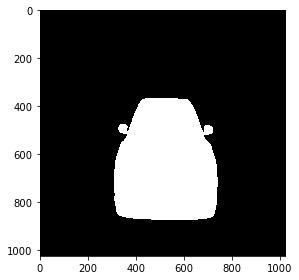

In [17]:
from skimage.transform import resize
img = resize(f["x_data"][0], (1024, 1024)) / 256
imshow(model.predict(np.array([img]))[0].squeeze() > 0.25)